# Assignment 2 - Predictive Process Monitoring

*Due: Friday, 15 December, 2023 at 14:00 CET*

In this assignment, you will learn to use several regression models to predict the process remaining time. In addition, you will also show that you can evaluate their performance and discuss the results in a report. The learning objectives of this assignment are: 

- use the data aggregation, feature encoding, and data transformation techniques to preprocess event data
- use the regression models to predict the remaining time of ongoing cases. 
- perform cross validation and fine-tune the model parameters of each algorithm
- calculate model performance (e.g., MAE, MSE, RMSE, R^2, etc.)
- design experiments to compare the performance of algorithms
- reflect on the difference between different models


This assignment includes two algorithms: Regression Tree (or Random Forest Regression) and kNN regressor. Following a similar structure as the first assignment, your first task is to perform data exploration and data cleaning. 
In Task 2, you will perform two trace encoding techniques (covered during Lecture 07). 
In Task 3-4, you will use the two algorithms to learn regression models to forecast the remaining time of each case after each event. 
In Task 5, you will compare the algorithms and evaluate their results. 

Please note that Task 3 and 4 have the following structure:
1. First, find the library (e.g., sklearn examples) and try out the algorithm by simply training the model on the training data (do not consider any parameters or cross validation just yet); 
2. Train the model with the training data by using cross validation and find the best parameter setting for the parameters of interest;
3. Report the average MAE, MSE, RMSE, and R^2 of all validation sets;
4. Finally, test the optimal model that has the best fitting parameters on your held-out test data, and report its MAE, MSE, RMSE, and R^2. 

Note that, in Task 5, you will need all the calculated MAE, MSE, RMSE, and R^2 on both encoded data from previous tasks. Make sure you save these to a list or dictionary so you can easily evaluate and compare the results. 



## Task 1: Exploring the data set



### Data set: Sepsis

Import the file *sepsis.csv* to load the Sepsis data set. This real-life event log contains events of sepsis cases from a hospital. Sepsis is a life threatening condition typically caused by an infection. One case represents a patient's pathway through the treatment process. The events were recorded by the ERP (Enterprise Resource Planning) system of the hospital. The original data set contains about 1000 cases with in total 15,000 events that were recorded for 16 different activities. Moreover, 39 data attributes are recorded, e.g., the group responsible for the activity, the results of tests and information from checklists. 

Additional information about the data can be found :
- https://data.4tu.nl/articles/dataset/Sepsis_Cases_-_Event_Log/12707639
- http://ceur-ws.org/Vol-1859/bpmds-08-paper.pdf




In [1]:
import pandas as pd
import numpy as np

In [2]:
data_sepsis = pd.read_csv("./sepsis.csv", sep=";")

In [3]:
data_sepsis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5176 entries, 0 to 5175
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DiagnosticArtAstrup        5176 non-null   object 
 1   DiagnosticBlood            5176 non-null   object 
 2   DiagnosticECG              5176 non-null   object 
 3   DiagnosticIC               5176 non-null   object 
 4   DiagnosticLacticAcid       5176 non-null   object 
 5   DiagnosticLiquor           5176 non-null   object 
 6   DiagnosticOther            5176 non-null   object 
 7   DiagnosticSputum           5176 non-null   object 
 8   DiagnosticUrinaryCulture   5176 non-null   object 
 9   DiagnosticUrinarySediment  5176 non-null   object 
 10  DiagnosticXthorax          5176 non-null   object 
 11  DisfuncOrg                 5176 non-null   object 
 12  Hypotensie                 5176 non-null   object 
 13  Hypoxie                    5176 non-null   objec

In [4]:
data_sepsis.describe()

,Age,CRP,LacticAcid,Leucocytes,duration,month,weekday,hour,remtime,elapsed
count,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000
mean,70.191267,33.845634,0.547276,4.700155,8.265385,6.531685,2.930835,11.244397,1193.775889,1574.430835
std,17.418468,74.729799,1.187220,10.590811,35.952867,3.568158,2.018046,8.203143,3469.657735,4087.046260
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,3.000000,0.000000,155.000000
50%,75.000000,0.000000,0.000000,0.000000,0.266667,6.000000,3.000000,9.000000,236.500000,759.000000
75%,85.000000,20.000000,0.700000,8.800000,7.366667,10.000000,5.000000,19.000000,1173.500000,1553.000000
max,90.000000,573.000000,11.000000,296.200000,782.466667,12.000000,6.000000,23.000000,47793.000000,47793.000000


In [5]:
data_sepsis.head()

,DiagnosticArtAstrup,DiagnosticBlood,DiagnosticECG,DiagnosticIC,DiagnosticLacticAcid,DiagnosticLiquor,DiagnosticOther,DiagnosticSputum,DiagnosticUrinaryCulture,DiagnosticUrinarySediment,...,CRP,LacticAcid,Leucocytes,Complete Timestamp,duration,month,weekday,hour,remtime,elapsed
0,True,True,True,True,True,False,False,False,True,True,...,21.0,2.2,9.6,2014-10-22 19:34:00,0.383333,10,2,19,0.0,1099.0
1,True,True,True,True,True,False,False,False,True,True,...,21.0,2.2,9.6,2014-10-22 19:33:37,6.616667,10,2,19,23.0,1076.0
2,True,True,True,True,True,False,False,False,True,True,...,21.0,2.2,9.6,2014-10-22 19:27:00,0.000000,10,2,19,420.0,679.0
3,True,True,True,True,True,False,False,False,True,True,...,21.0,2.2,0.0,2014-10-22 19:27:00,0.000000,10,2,19,420.0,679.0
4,True,True,True,True,True,False,False,False,True,True,...,0.0,2.2,0.0,2014-10-22 19:27:00,11.316667,10,2,19,420.0,679.0


In [6]:
len(data_sepsis['Case ID'].unique())

1035

In [7]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


### 1.1 Exploratory data analysis

For the data set, create 2-3 figures and tables that help you understand the data 

**Use the column "remtime" (which indicates the remaining time of each case after each corresponding event) as the response variable for regression**

Note that some of these variables are categorical variables. How would you preprocess these variables?


#### Tips: ---------------

During the data exploration, you, as a team, are trying to get an impression of the data. You will create figures and/or tables that help you to get to know the data. While exploring the data, you may also consider answering the following questions, which may help you understand the data better. For example, 

- How many variables are in the data? What are the data type and the distribution of each variable? 
- What is the discribution of the response variable?
- Are the variables informative?
- Are any pair of the potential predictor variables highly correlated?
- (Should the variables be normalized or not?)
- (Any relevant, useful preprocessing steps that may be taken?)



Make sure to at least check the data type of each variable and to understand the distribution of each variable, especially the response variable. 

Try to find out what factors seem to determine whether an instance is an outlier or not. What do you conclude?

*For creating data visualizations, you may consider using the matplot library and visit the [matplot gallery](https://matplotlib.org/stable/gallery/index.html) for inspiration (e.g., histograms for distribution, or heatmaps for feature correlation).*

In [8]:
# import packages
import matplotlib.pyplot as plt


# TODO: plot figure(s)


In [9]:
data_sepsis = pd.read_csv("./sepsis.csv", sep=";")

### 1.2 Data cleaning

You have now gathered some information about the data during the data exploration task. You also know from the assignment description that you will be using regression trees and kNN regression models to predict the remaining time.

Based on the above information, decide on which cleaning steps you will need to perform and implement them accordingly.


In [10]:
def object_to_bool(df_row: pd.Series):
    df_row.replace({'True': 1, 'False': 0, 'missing': np.nan}, inplace=True)

In [11]:
for column in data_sepsis:
    object_to_bool(data_sepsis[column])

In [12]:
data_sepsis['Complete Timestamp'] = pd.to_datetime(data_sepsis['Complete Timestamp'])

In [13]:
df_sorted = data_sepsis.sort_values(by="Complete Timestamp")
df_sorted.reset_index(inplace=True, drop=True)

In [14]:
df_sorted.groupby(by="Case ID")

In [15]:
pd.set_option("display.max_columns", None)

In [16]:
df_sorted.head()

,DiagnosticArtAstrup,DiagnosticBlood,DiagnosticECG,DiagnosticIC,DiagnosticLacticAcid,DiagnosticLiquor,DiagnosticOther,DiagnosticSputum,DiagnosticUrinaryCulture,DiagnosticUrinarySediment,DiagnosticXthorax,DisfuncOrg,Hypotensie,Hypoxie,InfectionSuspected,Infusion,Oligurie,SIRSCritHeartRate,SIRSCritLeucos,SIRSCritTachypnea,SIRSCritTemperature,SIRSCriteria2OrMore,Age,Case ID,Activity,Diagnose,org:group,CRP,LacticAcid,Leucocytes,Complete Timestamp,duration,month,weekday,hour,remtime,elapsed
0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,90.0,XJ,ER Registration,C,A,0.0,0.0,0.0,2013-11-07 17:18:29,0.000000,11,3,17,1951.0,0.0
1,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,90.0,XJ,ER Triage,C,C,0.0,0.0,0.0,2013-11-07 17:29:18,10.816667,11,3,17,1302.0,649.0
2,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,90.0,XJ,ER Sepsis Triage,C,A,0.0,0.0,0.0,2013-11-07 17:37:32,8.233333,11,3,17,808.0,1143.0
3,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,90.0,XJ,Leucocytes,C,B,0.0,0.0,296.2,2013-11-07 17:51:00,0.000000,11,3,17,0.0,1951.0
4,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,90.0,XJ,CRP,C,B,16.0,0.0,296.2,2013-11-07 17:51:00,13.466667,11,3,17,0.0,1951.0


In [17]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder

In [18]:
scaler = MinMaxScaler()
encoder = OrdinalEncoder()

In [19]:
df_analysis = df_sorted.copy()

In [20]:
df_encoded = pd.get_dummies(df_analysis[['Diagnose', 'org:group']], prefix=['Diagnose=', 'org:group='])
for col in df_encoded.columns:
    df_encoded[col].replace({True: 1, False: 0}, inplace=True)
df_analysis = pd.concat([df_analysis, df_encoded], axis=1)

In [21]:
df_analysis['Complete Timestamp'] = encoder.fit_transform(df_analysis['Complete Timestamp'].values.reshape(-1, 1))


In [22]:
scale_cols = ['CRP', 'LacticAcid', 'Leucocytes', 'duration', 'month', 'weekday', 'hour', 'remtime', 'elapsed', 'Complete Timestamp', "Age"]
df_analysis[scale_cols] = scaler.fit_transform(df_analysis[scale_cols])

In [23]:
df_analysis.drop(columns=['Diagnose', 'org:group'], inplace=True)

In [24]:
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5176 entries, 0 to 5175
Data columns (total 95 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DiagnosticArtAstrup        5107 non-null   float64
 1   DiagnosticBlood            5107 non-null   float64
 2   DiagnosticECG              5107 non-null   float64
 3   DiagnosticIC               5107 non-null   float64
 4   DiagnosticLacticAcid       5107 non-null   float64
 5   DiagnosticLiquor           5107 non-null   float64
 6   DiagnosticOther            5107 non-null   float64
 7   DiagnosticSputum           5107 non-null   float64
 8   DiagnosticUrinaryCulture   5107 non-null   float64
 9   DiagnosticUrinarySediment  5107 non-null   float64
 10  DiagnosticXthorax          5107 non-null   float64
 11  DisfuncOrg                 5107 non-null   float64
 12  Hypotensie                 5107 non-null   float64
 13  Hypoxie                    5107 non-null   float

In [25]:
df_analysis.describe()

,DiagnosticArtAstrup,DiagnosticBlood,DiagnosticECG,DiagnosticIC,DiagnosticLacticAcid,DiagnosticLiquor,DiagnosticOther,DiagnosticSputum,DiagnosticUrinaryCulture,DiagnosticUrinarySediment,DiagnosticXthorax,DisfuncOrg,Hypotensie,Hypoxie,InfectionSuspected,Infusion,Oligurie,SIRSCritHeartRate,SIRSCritLeucos,SIRSCritTachypnea,SIRSCritTemperature,SIRSCriteria2OrMore,Age,CRP,LacticAcid,Leucocytes,Complete Timestamp,duration,month,weekday,hour,remtime,elapsed,Diagnose=_A,Diagnose=_AA,Diagnose=_AB,Diagnose=_AC,Diagnose=_B,Diagnose=_BA,Diagnose=_BB,Diagnose=_C,Diagnose=_CA,Diagnose=_D,Diagnose=_E,Diagnose=_EA,Diagnose=_EB,Diagnose=_ED,Diagnose=_F,Diagnose=_FA,Diagnose=_G,Diagnose=_GA,Diagnose=_GB,Diagnose=_H,Diagnose=_HA,Diagnose=_HD,Diagnose=_IC,Diagnose=_J,Diagnose=_JC,Diagnose=_K,Diagnose=_KA,Diagnose=_LA,Diagnose=_LC,Diagnose=_M,Diagnose=_MA,Diagnose=_MD,Diagnose=_N,Diagnose=_OB,Diagnose=_P,Diagnose=_PC,Diagnose=_Q,Diagnose=_R,Diagnose=_RB,Diagnose=_RC,Diagnose=_S,Diagnose=_SB,Diagnose=_T,Diagnose=_TB,Diagnose=_U,Diagnose=_UA,Diagnose=_UC,Diagnose=_VA,Diagnose=_VB,Diagnose=_W,Diagnose=_XA,Diagnose=_Y,Diagnose=_YA,Diagnose=_Z,Diagnose=_ZA,Diagnose=_other,org:group=_A,org:group=_B,org:group=_C,org:group=_L
count,5107.000000,5107.000000,5107.000000,5107.000000,5107.000000,5107.000000,5107.000000,5107.000000,5107.000000,5107.000000,5107.000000,5107.000000,5107.000000,5107.000000,5107.000000,5107.000000,5107.000000,5107.000000,5107.000000,5107.000000,5107.000000,5107.000000,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000
mean,0.284120,0.787155,0.726454,0.811044,0.766791,0.005874,0.007832,0.028784,0.450362,0.493832,0.748385,0.061876,0.047778,0.018602,0.810456,0.755238,0.021343,0.776581,0.045819,0.567065,0.768357,0.815743,0.779903,0.059067,0.049752,0.015868,0.499968,0.010563,0.502880,0.488472,0.488887,0.024978,0.032943,0.001932,0.008887,0.002705,0.002318,0.078246,0.002705,0.007728,0.140649,0.009274,0.023377,0.066461,0.002318,0.002125,0.002125,0.007342,0.001932,0.038447,0.004057,0.004830,0.046754,0.003671,0.002318,0.004444,0.002318,0.004637,0.022411,0.007535,0.006762,0.002705,0.009080,0.003284,0.003478,0.009853,0.003478,0.005410,0.002125,0.010240,0.020093,0.003478,0.005216,0.011978,0.002318,0.004250,0.002898,0.009274,0.002512,0.002318,0.003478,0.004637,0.006376,0.002125,0.011012,0.002318,0.009467,0.004637,0.091190,0.366692,0.414219,0.194359,0.024730
std,0.451038,0.409359,0.445822,0.391512,0.422916,0.076426,0.088162,0.167215,0.497579,0.500011,0.433984,0.240954,0.213316,0.135128,0.391978,0.429988,0.144540,0.416578,0.209114,0.495530,0.421923,0.387732,0.193539,0.130418,0.107929,0.035756,0.288220,0.045948,0.324378,0.336341,0.356658,0.072598,0.085516,0.043916,0.093861,0.051942,0.048098,0.268584,0.051942,0.087577,0.347693,0.095861,0.151113,0.249110,0.048098,0.046055,0.046055,0.085376,0.043916,0.192291,0.063573,0.069337,0.211132,0.060482,0.048098,0.066518,0.048098,0.067942,0.148031,0.086484,0.081961,0.051942,0.094867,0.057221,0.058874,0.098782,0.058874,0.073358,0.046055,0.100681,0.140331,0.058874,0.072043,0.108799,0.048098,0.065063,0.053760,0.095861,0.050058,0.048098,0.058874,0.067942,0.079600,0.046055,0.104370,0.048098,0.096845,0.067942,0.287907,0.481948,0.492

In [26]:
df_analysis.isna().sum()

DiagnosticArtAstrup     69
DiagnosticBlood         69
DiagnosticECG           69
DiagnosticIC            69
DiagnosticLacticAcid    69
                        ..
Diagnose=_other          0
org:group=_A             0
org:group=_B             0
org:group=_C             0
org:group=_L             0
Length: 95, dtype: int64

In [27]:
# Activity to be encoded in task 2
# Case ID is not dropped so it can be used for visualizations and grouping. It is dropped before handing data to models

### 1.3 Process Discovery and Visualization (Optional)

This is an optional task to show you how process discovery and visualizaion can be deployed using the pm4py library. 

(*The following code requires the graphviz library to be installed. If you have issues with installing the graphviz, you may try to follow the instructions on Install GraphViz on the [pm4py](https://pm4py.fit.fraunhofer.de/install-page) install page*)

The following code:
- fill in the columns for case id, activity, and timestamps
- convert the data set into an event log
- discover a Directly-follows graph (DFG) and a process model for each event log. 
- you may use the discovered process model in your report



## Task 2: Preprocessing and Trace Encoding


### 2.1 Trace Encoding


- Implement the last-2-state encoding for the data set 
- Implement the aggregated encoding for the data set (for example, see [1], Table 6)


<span style="color:gray">[1] Ilya Verenich, Marlon Dumas, Marcello La Rosa, Fabrizio Maria Maggi, Irene Teinemaa:
Survey and Cross-benchmark Comparison of Remaining Time Prediction Methods in Business Process Monitoring. ACM Trans. Intell. Syst. Technol. 10(4): 34:1-34:34 (2019) [Section 1, 2, 4.1, 4.3, 4.6, 5.2, 5.3, 5.4, and 6] </span>

These two encodings are discussed during lecture 7.
In case you find difficult to implement the algorithms, you may also consider use the pandas functions to help you:
- for the last-2-state encoding, check the pandas groupby.DataFrameGroupBy.shift and see the [answer on the stake overflow](https://stackoverflow.com/questions/53335567/use-pandas-shift-within-a-group)
- for the aggregated encoding check the pandas groupby.DataFrameGroupBy and cumsum function and read the [examples and answers on the stake overflow](https://stackoverflow.com/a/49578219)

In [28]:
# TODO: Implement the function that returns the last-state encoding of a log
def last_2_state_encoding(_data, columncase, columnactivity):
    _data.groupby(by = columncase)
    df_sorted = _data.copy()
    df_sorted['prev_activity'] = np.where(df_sorted[columncase] == df_sorted[columncase].shift(1), df_sorted[columnactivity].shift(1), None)
    df_sorted['prev_2_activity'] = np.where(df_sorted[columncase] == df_sorted[columncase].shift(2), df_sorted[columnactivity].shift(2), None)
    df_sorted = df_sorted.drop(columns = [columnactivity])
    return df_sorted

def onehotencoder(data: pd.DataFrame, columns: list):
    ohcdata = pd.get_dummies(data, columns = columns)
    for col in ohcdata.columns:
        ohcdata[col].replace({True: 1, False: 0}, inplace=True)
    
    return ohcdata
    
data_sepsis_ls = last_2_state_encoding(df_analysis, "Case ID", "Activity")
data_sepsis_ls = onehotencoder(data = data_sepsis_ls, columns = ["prev_activity", "prev_2_activity"])
data_sepsis_ls = data_sepsis_ls.drop(columns = ["Case ID"])

In [29]:
data_sepsis_ls

,DiagnosticArtAstrup,DiagnosticBlood,DiagnosticECG,DiagnosticIC,DiagnosticLacticAcid,DiagnosticLiquor,DiagnosticOther,DiagnosticSputum,DiagnosticUrinaryCulture,DiagnosticUrinarySediment,DiagnosticXthorax,DisfuncOrg,Hypotensie,Hypoxie,InfectionSuspected,Infusion,Oligurie,SIRSCritHeartRate,SIRSCritLeucos,SIRSCritTachypnea,SIRSCritTemperature,SIRSCriteria2OrMore,Age,CRP,LacticAcid,Leucocytes,Complete Timestamp,duration,month,weekday,hour,remtime,elapsed,Diagnose=_A,Diagnose=_AA,Diagnose=_AB,Diagnose=_AC,Diagnose=_B,Diagnose=_BA,Diagnose=_BB,Diagnose=_C,Diagnose=_CA,Diagnose=_D,Diagnose=_E,Diagnose=_EA,Diagnose=_EB,Diagnose=_ED,Diagnose=_F,Diagnose=_FA,Diagnose=_G,Diagnose=_GA,Diagnose=_GB,Diagnose=_H,Diagnose=_HA,Diagnose=_HD,Diagnose=_IC,Diagnose=_J,Diagnose=_JC,Diagnose=_K,Diagnose=_KA,Diagnose=_LA,Diagnose=_LC,Diagnose=_M,Diagnose=_MA,Diagnose=_MD,Diagnose=_N,Diagnose=_OB,Diagnose=_P,Diagnose=_PC,Diagnose=_Q,Diagnose=_R,Diagnose=_RB,Diagnose=_RC,Diagnose=_S,Diagnose=_SB,Diagnose=_T,Diagnose=_TB,Diagnose=_U,Diagnose=_UA,Diagnose=_UC,Diagnose=_VA,Diagnose=_VB,Diagnose=_W,Diagnose=_XA,Diagnose=_Y,Diagnose=_YA,Diagnose=_Z,Diagnose=_ZA,Diagnose=_other,org:group=_A,org:group=_B,org:group=_C,org:group=_L,prev_activity_CRP,prev_activity_ER Registration,prev_activity_ER Sepsis Triage,prev_activity_ER Triage,prev_activity_LacticAcid,prev_activity_Leucocytes,prev_2_activity_CRP,prev_2_activity_ER Registration,prev_2_activity_ER Sepsis Triage,prev_2_activity_ER Triage,prev_2_activity_LacticAcid,prev_2_activity_Leucocytes
0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.909091,0.5,0.739130,0.040822,0.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.000000,0.000000,0.0,0.000000,0.000262,0.013824,0.909091,0.5,0.739130,0.027242,0.013579,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.000000,0.000000,0.0,0.000000,0.000523,0.010522,0.909091,0.5,0.739130,0.016906,0.023916,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.000000,0.000000,0.0,1.000000,0.000785,0.000000,0.909091,0.5,0.739130,0.000000,0.040822,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.000000,0.027923,0.0,1.000000,0.000785,0.017211,0.909091,0.5,0.739130,0.000000,0.040822,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.417103,0.0,0.000000,0.999215,0.000000,0.090909,0.5,0.782609,0.128282,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.83333

In [30]:
data_sepsis_ls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5176 entries, 0 to 5175
Columns: 105 entries, DiagnosticArtAstrup to prev_2_activity_Leucocytes
dtypes: float64(33), int64(72)
memory usage: 4.1 MB


In [31]:
# TODO: Implement the function that returns the aggregated state encoding of a log
target_columns = ['act_CRP', 'act_ER Registration', 'act_ER Sepsis Triage', 'act_ER Triage', 'act_LacticAcid', 'act_Leucocytes']

def agg_state_encoding(_data: pd.DataFrame, columncase, columnactivity):
    df_aggstate = pd.get_dummies(_data, prefix='act', columns=[columnactivity])
    df_aggstate[target_columns] = df_aggstate.groupby(by=columncase)[target_columns].cumsum()
    return df_aggstate

# TODO: for each of the two data sets, create a last_2_state encoding and an aggregated state encoding
data_sepsis_ag = agg_state_encoding(df_analysis, "Case ID", "Activity")
data_sepsis_ag = data_sepsis_ag.drop(columns = ["Case ID"])

In [34]:
data_sepsis_ag.dropna(axis=1, inplace=True)

### 2.2 Create Training and Held-out test data sets


Create a training and a held-out test data set. *Later in Task 3-4, the training data will be used to perform cross-validation. The held-out test data will be used to evaluate the performance of the selected models.*

Choose the size of your test data. Furthermore, how did you split the data? Motivate your choice when you discuss the experiment setup in your report. 



Tips: *You may consider reuse some of your code from Assignment 1 Task 1.2*

In [35]:
# Create training data and held-out test data for *data_sepsis_ls*
X = data_sepsis_ls.drop(columns=['remtime'])
y = data_sepsis_ls['remtime']

X_lstrain, X_lstest, y_lstrain, y_lstest = train_test_split(X, y, test_size=0.30, random_state=6, shuffle=True)

In [ ]:
# Create training data and held-out test data for *data_sepsis_ag*
X = data_sepsis_ag.drop(columns=['remtime', 'Case ID'])
y = data_sepsis_ag['remtime']

X_agtrain, X_agtest, y_agtrain, y_agtest = train_test_split(X, y, test_size=0.30, random_state=6, shuffle=True)

## Task 3: Predicting Case Remaining Time - Regression Trees


In this task, you will use the regression tree (or random forest regression if you prefer) to learn a regression model to predict case remaining time. Very similar to how you have trained a classification model in Assignment 1, now perform the following steps to train a regression model. 

i) use the default values for the parameters to get a [Regression Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor) (or a [Random Forest Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)) running on the training data. (*Optional: visualize the tree, the feature importance, and compute the error measures to get an impression of the performance of the model*).

ii) use 5-fold cross-validation to determine a possibly better choice for the two parameters *min_samples_leaf* and *max_depth*
    
iii) create 2D or 3D plot that shows how the selected parameters affect the performance. 

iv) select the best-performing regression tree (or forest), i.e., the one that achieved the lowest cross-validated errors, and report all the error measures (MAE, MSE, RMSE, R^2) of the fitted model on the held-out test data. 

    
#### TIPS:
You may consider reuse the some of your code of Assignment 1 or use the [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) class (see an [example](https://www.dezyre.com/recipes/find-optimal-parameters-using-gridsearchcv-for-regression), but be aware that GridSearchSV does not return MAE or the other error measures (e.g., MSE, RMSE, R^2), you will need to update the scoring function)



In [ ]:
# import packages
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer

# define scorers
mae_scorer = make_scorer(mean_absolute_error)
mse_scorer = make_scorer(mean_squared_error)
rmse_scorer = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)))
r2_scorer = make_scorer(r2_score)

# define dictionary of scorers
scorers = {
    'MAE': mae_scorer,
    'MSE': mse_scorer,
    'RMSE': rmse_scorer,
    'R2': r2_scorer
}

# define variables for upcoming functions
main_scorer = 'MAE'
main_test = f'mean_test_{main_scorer}'

# define function for score retrieval
def measure_performance(y_test, y_pred):
    return [mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred)), r2_score(y_test, y_pred)]

In [ ]:
# TODO: import packages
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold, GridSearchCV

In [ ]:
# TODO: set the search space of the parameters *min_samples_leaf* and *max_depth*
dtr_params = {
    'min_samples_leaf': [1, 2, 4, 8, 16, 32, 64],
    'max_depth': [1, 2, 4, 8, 16, 32, 64, None]
}

# TODO: create 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=0)

# TODO: learn an optimal regression tree model (random forest regressor)
dtr = DecisionTreeRegressor(random_state=0)
dtr_ls_optimized = GridSearchCV(dtr, dtr_params, scoring=scorers, refit=main_scorer, cv=kf)

In [ ]:
# fit the model
dtr_ls_optimized.fit(X_lstrain, y_lstrain)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [1, 2, 4, 8, 16, 32, 64, None],
                         'min_samples_leaf': [1, 2, 4, 8, 16, 32, 64]},
             refit='MAE',
             scoring={'MAE': make_scorer(mean_absolute_error),
                      'MSE': make_scorer(mean_squared_error),
                      'R2': make_scorer(r2_score),
                      'RMSE': make_scorer(<lambda>)})

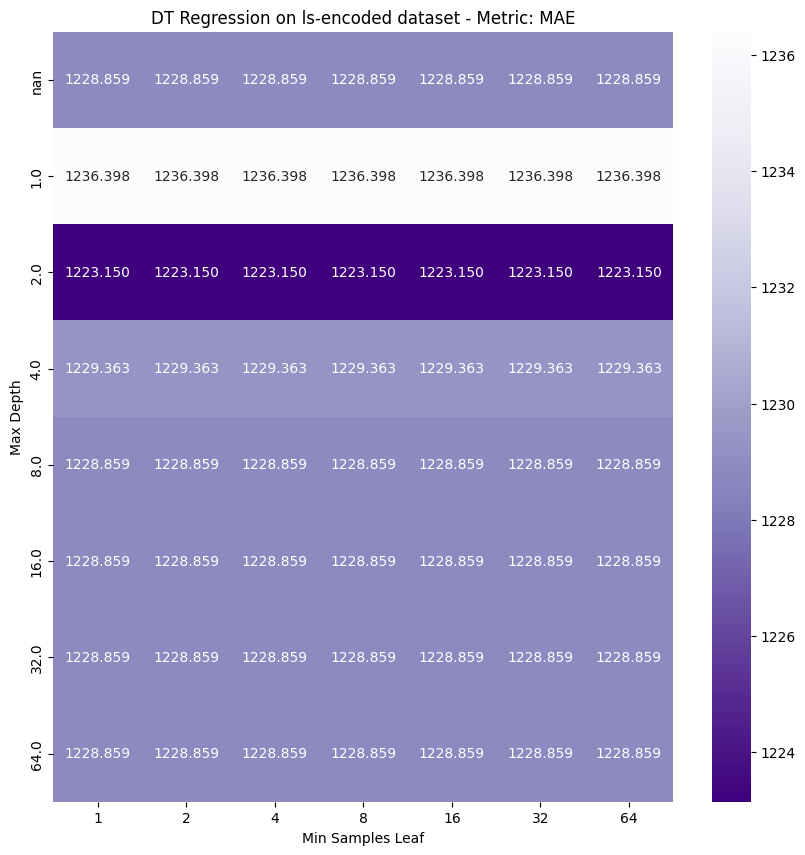

In [ ]:
# TODO: create 2D or 3D plot that shows how the selected parameter values affect the MAE (or RMSE). 
import seaborn as sns
import matplotlib.pyplot as plt

# Create a dataframe from the grid search results
dtr_ls_results = pd.DataFrame(dtr_ls_optimized.cv_results_)

# Create a pivot table from the dataframe
dtr_pivot_table = dtr_ls_results.pivot(index='param_max_depth', columns='param_min_samples_leaf', values=f'mean_test_{main_scorer}')

# Create a heatmap from the pivot table
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(dtr_pivot_table, annot=True, fmt='.3f', cmap='Purples_r', ax=ax)
ax.set_title(f"""DT Regression on ls-encoded dataset - Metric: {main_scorer}""")
ax.set_xlabel('Min Samples Leaf')
ax.set_ylabel('Max Depth')
plt.show()

In [ ]:
# TODO: compute the performance of the model on your held-out test data
dtr_ls_optimized.fit(X_lstrain, y_lstrain)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [1, 2, 4, 8, 16, 32, 64, None],
                         'min_samples_leaf': [1, 2, 4, 8, 16, 32, 64]},
             refit='MAE',
             scoring={'MAE': make_scorer(mean_absolute_error),
                      'MSE': make_scorer(mean_squared_error),
                      'R2': make_scorer(r2_score),
                      'RMSE': make_scorer(<lambda>)})

In [ ]:
# predict the test data
y_pred_dtr_ls_optimized = dtr_ls_optimized.predict(X_lstest)

# Retrieve scores
dtr_ls_results_test = measure_performance(y_lstest, y_pred_dtr_ls_optimized)

In [ ]:
# TODO: repeat the above steps for *data_Sepsis_ag* and compare the results

# learn an optimal regression tree model (random forest regressor)
dtr = DecisionTreeRegressor(random_state=0)
dtr_ag_optimized = GridSearchCV(dtr, dtr_params, scoring=scorers, refit=main_scorer, cv=kf)

In [ ]:
# Fit the model
dtr_ag_optimized.fit(X_agtrain, y_agtrain)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [1, 2, 4, 8, 16, 32, 64, None],
                         'min_samples_leaf': [1, 2, 4, 8, 16, 32, 64]},
             refit='MAE',
             scoring={'MAE': make_scorer(mean_absolute_error),
                      'MSE': make_scorer(mean_squared_error),
                      'R2': make_scorer(r2_score),
                      'RMSE': make_scorer(<lambda>)})

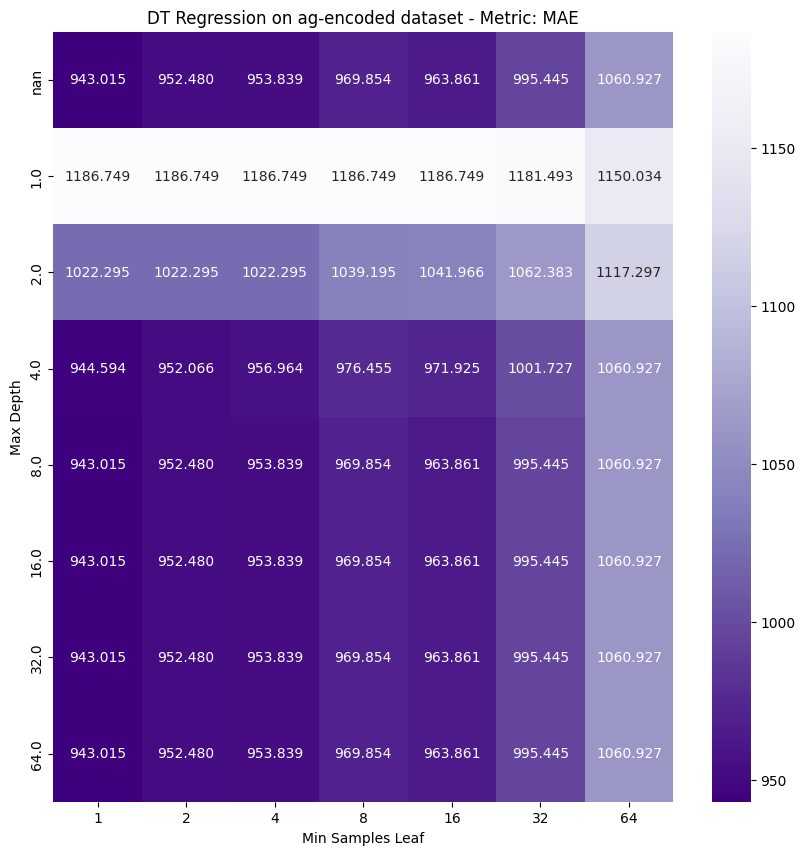

In [ ]:
# create 2D or 3D plot that shows how the selected parameter values affect the MAE (or RMSE). 
# create a dataframe from the grid search results
dtr_ag_results = pd.DataFrame(dtr_ag_optimized.cv_results_)

# create a pivot table from the dataframe
dtr_pivot_table = dtr_ag_results.pivot(index='param_max_depth', columns='param_min_samples_leaf', values='mean_test_MAE')

# create a heatmap from the pivot table
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(dtr_pivot_table, annot=True, fmt='.3f', cmap='Purples_r', ax=ax)
ax.set_title(f"""DT Regression on ag-encoded dataset - Metric: {main_scorer}""")
ax.set_xlabel('Min Samples Leaf')
ax.set_ylabel('Max Depth')
plt.show()

In [ ]:
# compute the performance of the model on your held-out test data
dtr_ag_optimized.fit(X_agtrain, y_agtrain)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [1, 2, 4, 8, 16, 32, 64, None],
                         'min_samples_leaf': [1, 2, 4, 8, 16, 32, 64]},
             refit='MAE',
             scoring={'MAE': make_scorer(mean_absolute_error),
                      'MSE': make_scorer(mean_squared_error),
                      'R2': make_scorer(r2_score),
                      'RMSE': make_scorer(<lambda>)})

In [ ]:
# predict the test data
y_pred_dtr_ag_optimized = dtr_ag_optimized.predict(X_agtest)

# Store all scores
dtr_ag_results_test = measure_performance(y_agtest, y_pred_dtr_ag_optimized)

## Task 4. Predicting Case Remaining Time - kNN Regression


In this task, you will use the kNN Regression to learn a regression model to predict case remaining time. The same as task 3, now perform the following steps to train a regression model. 

i) use the default values for the parameters to get a [kNN Regression](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor) running on the training data. (*Optional: compute the error measures to get an impression of the performance of the model).

ii) use 5-fold cross-validation to determine a possibly better choice for the two parameters *n_neighbors* and *weights* 
    
iii) create 2D or 3D plot that shows how the selected parameters affect the performance. 

iv) select the best-performing kNN, i.e., the one that achieved the lowest cross-validated errors, and report all the error measures (MAE, MSE, RMSE, R^2) of the fitted model on the held-out test data. 

    
#### TIPS:
The same here, you may consider reuse the some of your code of Assignment 1 or use the [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) class (see an [example](https://www.dezyre.com/recipes/find-optimal-parameters-using-gridsearchcv-for-regression), but be aware that GridSearchSV does not return MAE or the other error measures (e.g., MSE, RMSE, R^2), you will need to update the scoring function)







In [ ]:
# TODO: import packages
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold, GridSearchCV

In [ ]:
# TODO: set the search space of the parameters *n_neighbors* and *weights* 
knr_params = {
    'n_neighbors': [1, 2, 4, 5, 8, 16, 32, 64],
    'weights': ['uniform', 'distance']
}

# TODO: create 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=0)

# TODO: learn an optimal kNN regressor
knr = KNeighborsRegressor()
knr_ls_optimized = GridSearchCV(knr, knr_params, scoring=scorers, refit=main_scorer, cv=kf)

In [ ]:
# fit the model
knr_ls_optimized.fit(X_lstrain, y_lstrain)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 4, 5, 8, 16, 32, 64],
                         'weights': ['uniform', 'distance']},
             refit='MAE',
             scoring={'MAE': make_scorer(mean_absolute_error),
                      'MSE': make_scorer(mean_squared_error),
                      'R2': make_scorer(r2_score),
                      'RMSE': make_scorer(<lambda>)})

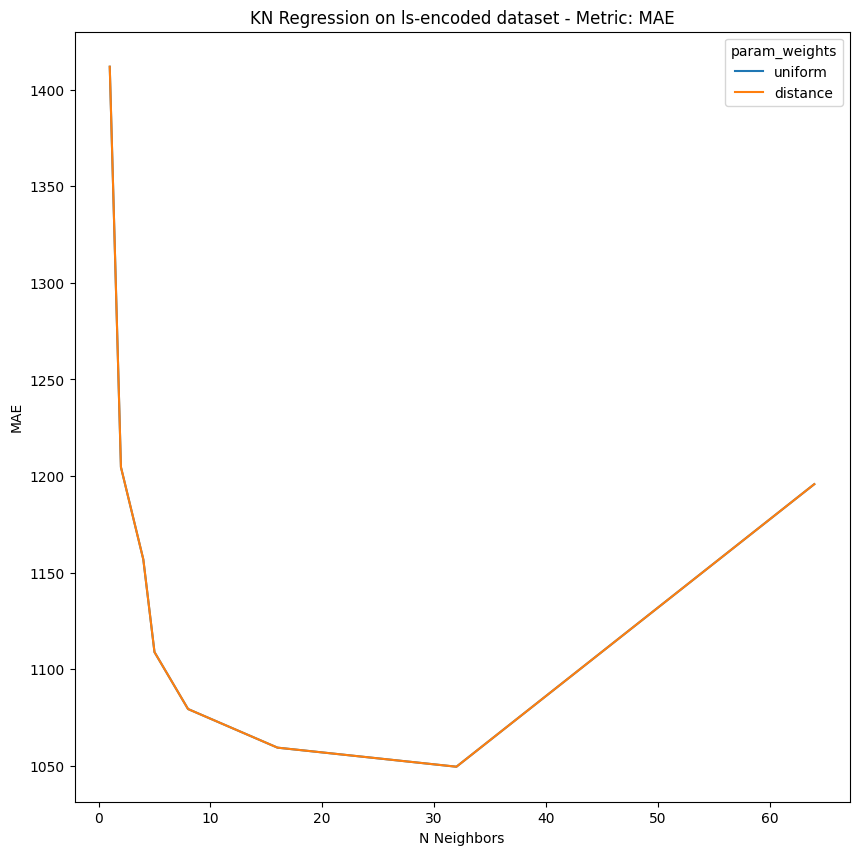

In [ ]:
# TODO: create 2D or 3D plot that shows how the selected parameter values affect the MAE (or RMSE). 
import seaborn as sns
import warnings
import matplotlib.pyplot as plt

# Ignore future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Create a dataframe from the grid search results
knr_ls_results = pd.DataFrame(knr_ls_optimized.cv_results_)

# Create a line chart from the dataframw showing mean_test_MAE for each value of n_neighbors for all values of weights
fig, ax = plt.subplots(figsize=(10, 10))
sns.lineplot(data=knr_ls_results, x='param_n_neighbors', y=f'mean_test_{main_scorer}', hue='param_weights', ax=ax)
ax.set_title(f"""KN Regression on ls-encoded dataset - Metric: {main_scorer}""")
ax.set_xlabel('N Neighbors')
ax.set_ylabel(f'{main_scorer}')
plt.show()

In [ ]:
# TODO: compute the performance of the model on your held-out test data

# predict the test data
y_pred_knr_ls_optimized = knr_ls_optimized.predict(X_lstest)

# Store all scores
knr_ls_results_test = measure_performance(y_lstest, y_pred_knr_ls_optimized)

In [ ]:
# learn an optimal kNN regressor
knr = KNeighborsRegressor()
knr_ag_optimized = GridSearchCV(knr, knr_params, scoring=scorers, refit=main_scorer, cv=kf)

# fit the model
knr_ag_optimized.fit(X_agtrain, y_agtrain)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 4, 5, 8, 16, 32, 64],
                         'weights': ['uniform', 'distance']},
             refit='MAE',
             scoring={'MAE': make_scorer(mean_absolute_error),
                      'MSE': make_scorer(mean_squared_error),
                      'R2': make_scorer(r2_score),
                      'RMSE': make_scorer(<lambda>)})

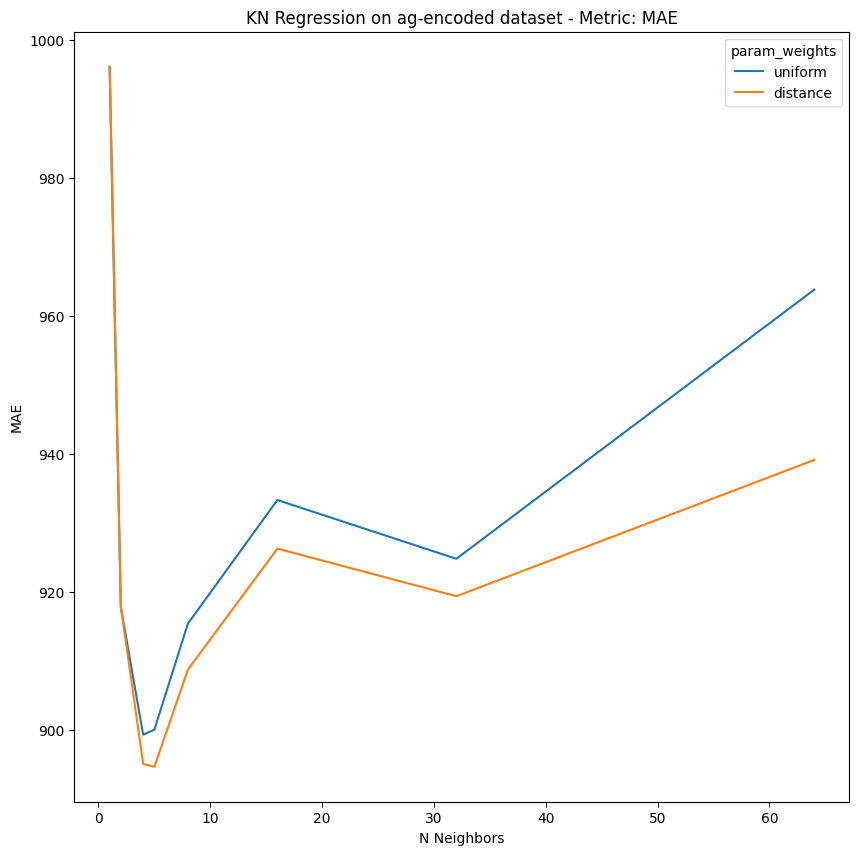

In [ ]:
# TODO: create 2D or 3D plot that shows how the selected parameter values affect the MAE (or RMSE). 
import seaborn as sns
import warnings
import matplotlib.pyplot as plt

# Ignore future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Create a dataframe from the grid search results
knr_ag_results = pd.DataFrame(knr_ag_optimized.cv_results_)

# Create a line chart from the dataframw showing mean_test_MAE for each value of n_neighbors for all values of weights
fig, ax = plt.subplots(figsize=(10, 10))
sns.lineplot(data=knr_ag_results, x='param_n_neighbors', y='mean_test_MAE', hue='param_weights', ax=ax)
ax.set_title(f"""KN Regression on ag-encoded dataset - Metric: {main_scorer}""")
ax.set_xlabel('N Neighbors')
ax.set_ylabel(f'{main_scorer}')
plt.show()

In [ ]:
# TODO: compute the performance of the model on your held-out test data

# predict the test data
y_pred_knr_ag_optimized = knr_ag_optimized.predict(X_agtest)

# Store all scores
knr_ag_results_test = measure_performance(y_agtest, y_pred_knr_ag_optimized)

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Data for the bar plots
scorer_list = ['MAE', 'MSE', 'RMSE', 'R2']

result_list = [dtr_ls_results, dtr_ls_results_test, dtr_ag_results, dtr_ag_results_test, knr_ls_results, knr_ls_results_test, knr_ag_results, knr_ag_results_test]
regressor_list = ['CV DT - LS', 'Test DT - LS', 'CV DT - AG', 'Test DT - AG', 'CV KN - LS', 'Test KN - LS', 'CV KN - AG', 'Test KN - AG']

mae_values = []
mse_values = []
rmse_values = []
r2_values = []
i = 0

for result in result_list:
    if i == 1 or i == 3 or i == 5 or i == 7:
        mae_values.append(result[0])
        mse_values.append(result[1])
        rmse_values.append(result[2])
        r2_values.append(result[3])
    else:
        mae_values.append(result.loc[result[f'rank_test_{scorer_list[0]}'] == 1, f'mean_test_{scorer_list[0]}'].values[0])
        mse_values.append(result.loc[result[f'rank_test_{scorer_list[1]}'] == 1, f'mean_test_{scorer_list[1]}'].values[0])
        rmse_values.append(result.loc[result[f'rank_test_{scorer_list[2]}'] == 1, f'mean_test_{scorer_list[2]}'].values[0])
        r2_values.append(result.loc[result[f'rank_test_{scorer_list[3]}'] == 1, f'mean_test_{scorer_list[3]}'].values[0])
    i += 1


# Create subplots
fig = make_subplots(rows=2, cols=2, subplot_titles=['MAE', 'MSE', 'RMSE', 'R2'])

# Add bar plots to subplots
fig.add_trace(go.Bar(x=regressor_list, y=mae_values), row=1, col=1)
fig.add_trace(go.Bar(x=regressor_list, y=mse_values), row=1, col=2)
fig.add_trace(go.Bar(x=regressor_list, y=rmse_values), row=2, col=1)
fig.add_trace(go.Bar(x=regressor_list, y=r2_values), row=2, col=2)

# Update layout
fig.update_layout(title='Performance of the models on train and test data using ls and ag encoding')

# Update colors to blue purple yellow and green
fig.update_traces(marker_color=['#003f5c', '#003f5c', '#58508d', '#58508d', '#bc5090', '#bc5090', '#ff6361', '#ff6361'])

# Update legend trace 'trace 0' to 'train'
fig.update_traces(name='')

# Show the figure
fig.show()

## Task 5.  Report your results and discuss your findings

By now, you have applied two algorithms with different parameters on the two encodings of the data set. For each algorithm and each encoding, you have created tables or figures which you can add to your report. Discuss the results and their optimal performance. 

Create an overview table or figure that shows the optimal performance of each algorithm on the data set, for example, see the table here below. 


Discuss your findings and reflect on the following questions in your report:
- According to the error measures, which one would you suggest as the optimal model? 
- Are there any discrepancies between the MAE, MSE, RMSE, and R^2 measures in terms of which model performs the best? If yes, how would you explain these discrepancies. 
- Which one of the MAE, MSE, RMSE, and R^2 would you use for selecting the model? Why?
- Which one of the encoding would you suggest for this data set? Why?
- Which features have a big influence on predicting the remaining time?







| Encoding | Model | CV MAE  | Test MAE |  CV MSE  |  Test MSE  | CV R^2 | Test R^2 |... |
|------|------|------|------|------|------|------|------|-----|
|  Last-2-state | Regression Tree        |  |  | | | | |
|  Agg-state |  Regression Tree  |  |  | || | |
|   Last-2-state |kNN       |  |  | || | |
|   ... |...       |  |  | || | |











## Bonus Tasks 

We would like to challenge you with the following bonus tasks. For each task that is successfully completed, you may obtain max. 1 extra point. 

1. Implement or use another regression algorithm (for example, [Random Forest Regression](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html), [LinearRegresion](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), [SVM Regression](https://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html#sphx-glr-auto-examples-svm-plot-svm-regression-py)) or design your own algorithm that achieves a better MAE measure. Explain this in your report.
2. Implement techniques (e.g., preprocessing, feature engineering, feature selection, sampling) that help improve the MAE scores of existing models. For example, try out a feature selection for kNN or implement inter-case features. Explain this in your report.

